In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

data = pd.read_csv('pd_speech_features.csv')

print(f"Liczba próbek: {data.shape[0]}")
print(f"Liczba cech: {data.shape[1]-1}")  
print("\nPierwsze 5 wierszy:")
display(data.head())

X = data.drop(['id', 'gender', 'class'], axis=1) 
y = data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Liczba próbek: 756
Liczba cech: 754

Pierwsze 5 wierszy:


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


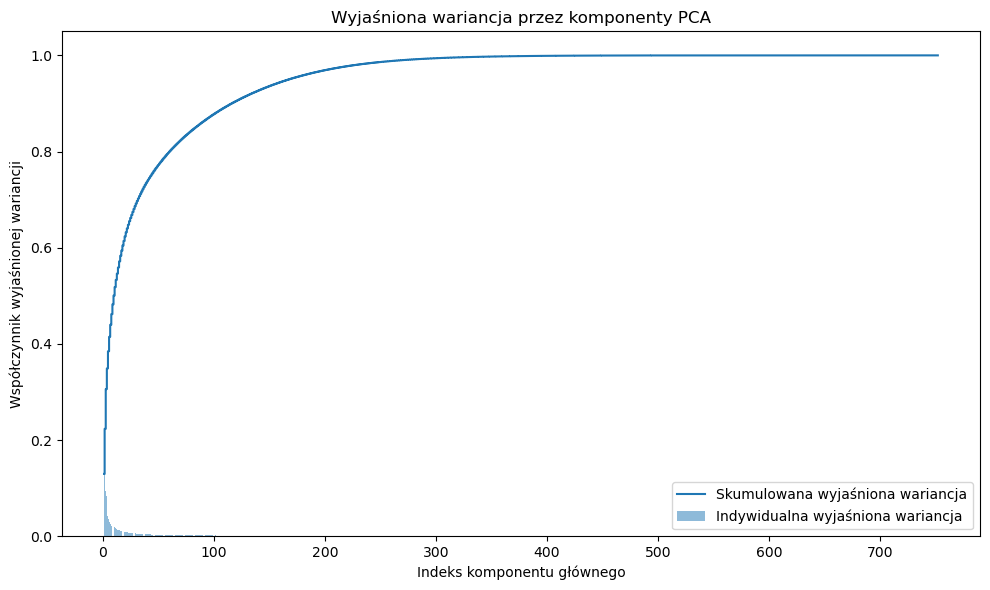

Liczba komponentów wyjaśniających 95% wariancji: 168


In [4]:
# Pełna analiza PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, 
        align='center', label='Indywidualna wyjaśniona wariancja')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid',
         label='Skumulowana wyjaśniona wariancja')
plt.ylabel('Współczynnik wyjaśnionej wariancji')
plt.xlabel('Indeks komponentu głównego')
plt.legend(loc='best')
plt.title('Wyjaśniona wariancja przez komponenty PCA')
plt.tight_layout()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Liczba komponentów wyjaśniających 95% wariancji: {n_components_95}")


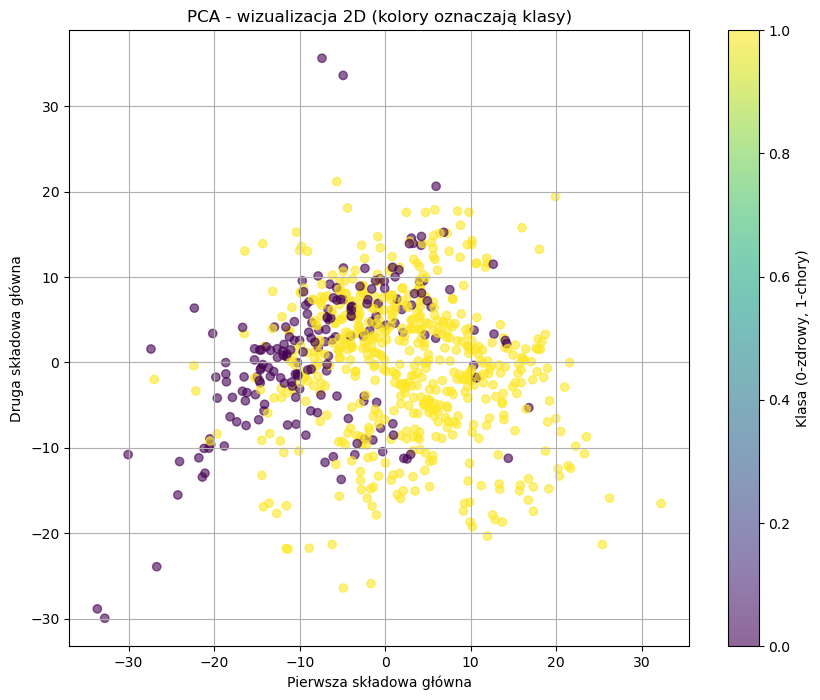

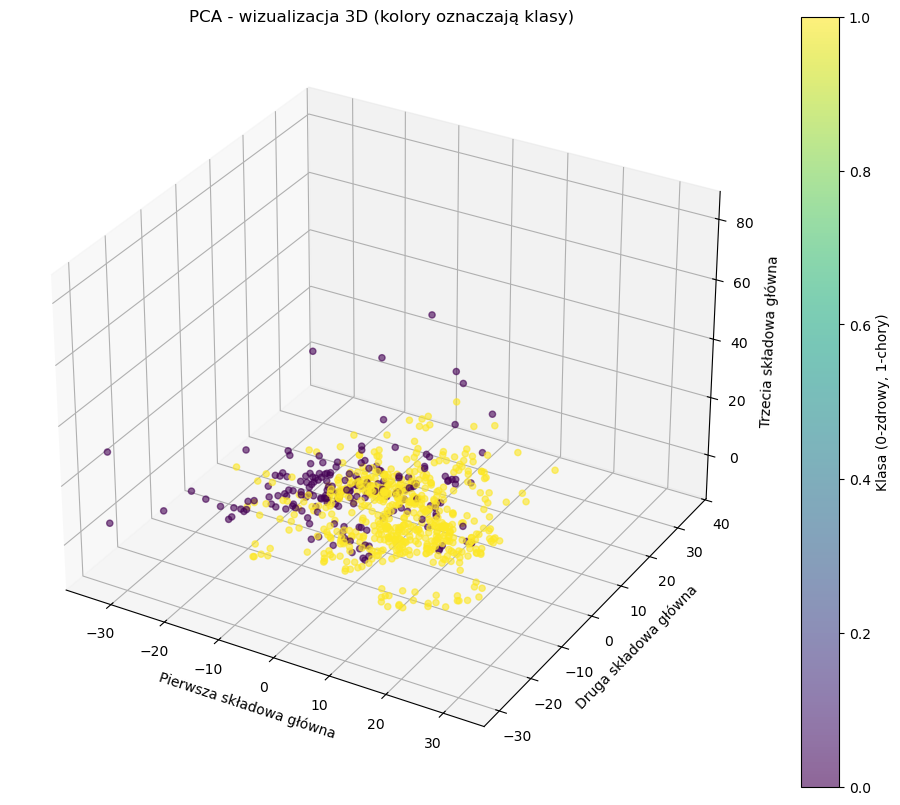

In [6]:
# PCA z 2 komponentami
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Wizualizacja 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.title('PCA - wizualizacja 2D (kolory oznaczają klasy)')
plt.colorbar(scatter, label='Klasa (0-zdrowy, 1-chory)')
plt.grid(True)
plt.show()

# PCA z 3 komponentami
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Wizualizacja 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.6)
ax.set_xlabel('Pierwsza składowa główna')
ax.set_ylabel('Druga składowa główna')
ax.set_zlabel('Trzecia składowa główna')
ax.set_title('PCA - wizualizacja 3D (kolory oznaczają klasy)')
fig.colorbar(scatter, ax=ax, label='Klasa (0-zdrowy, 1-chory)')
plt.show()

C:\Users\Dawid\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dawid\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Dawid\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dawid\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Dawid\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

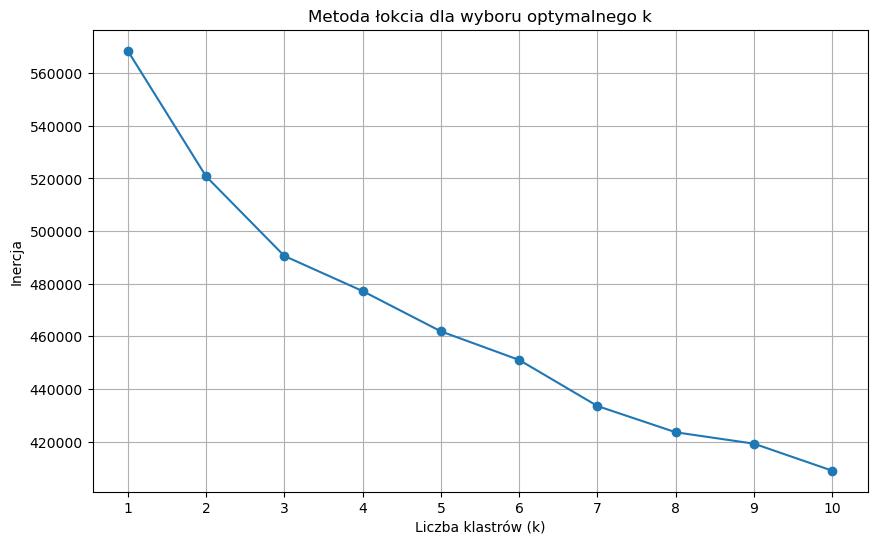

C:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

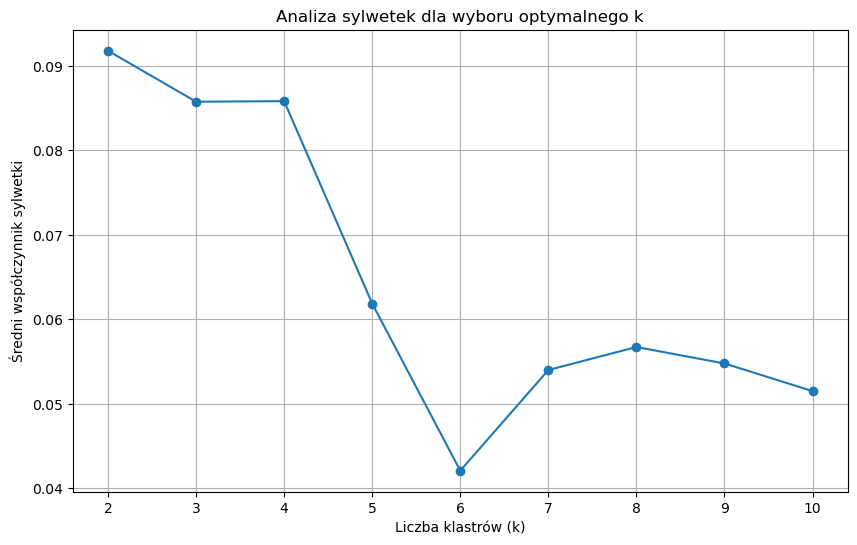

In [8]:
# Metoda łokcia
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inercja')
plt.title('Metoda łokcia dla wyboru optymalnego k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Analiza sylwetek dla wyboru k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Średni współczynnik sylwetki')
plt.title('Analiza sylwetek dla wyboru optymalnego k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


C:\Users\Dawid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


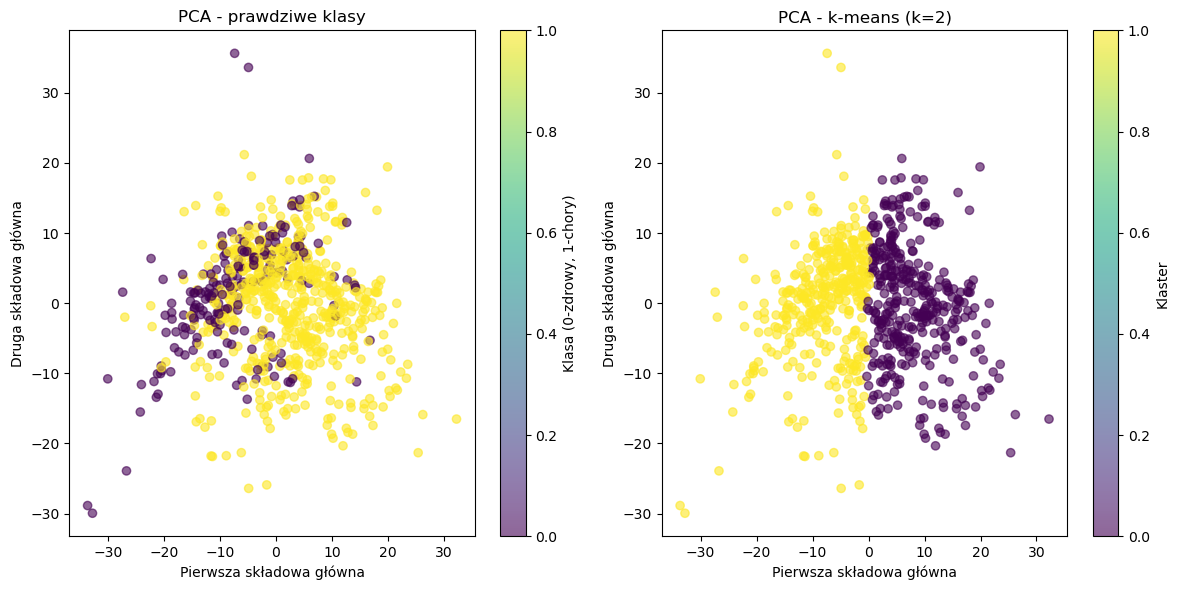

Macierz pomyłek (klaster 0 vs klasa 0, klaster 1 vs klasa 1):
[[ 41 151]
 [334 230]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.11      0.21      0.14       192
           1       0.60      0.41      0.49       564

    accuracy                           0.36       756
   macro avg       0.36      0.31      0.32       756
weighted avg       0.48      0.36      0.40       756



In [10]:
# Wybór k=2 
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.title('PCA - prawdziwe klasy')
plt.colorbar(scatter, label='Klasa (0-zdrowy, 1-chory)')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.title(f'PCA - k-means (k={optimal_k})')
plt.colorbar(scatter, label='Klaster')

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report

print("Macierz pomyłek (klaster 0 vs klasa 0, klaster 1 vs klasa 1):")
print(confusion_matrix(y, kmeans_labels))

print("\nRaport klasyfikacji:")
print(classification_report(y, kmeans_labels))

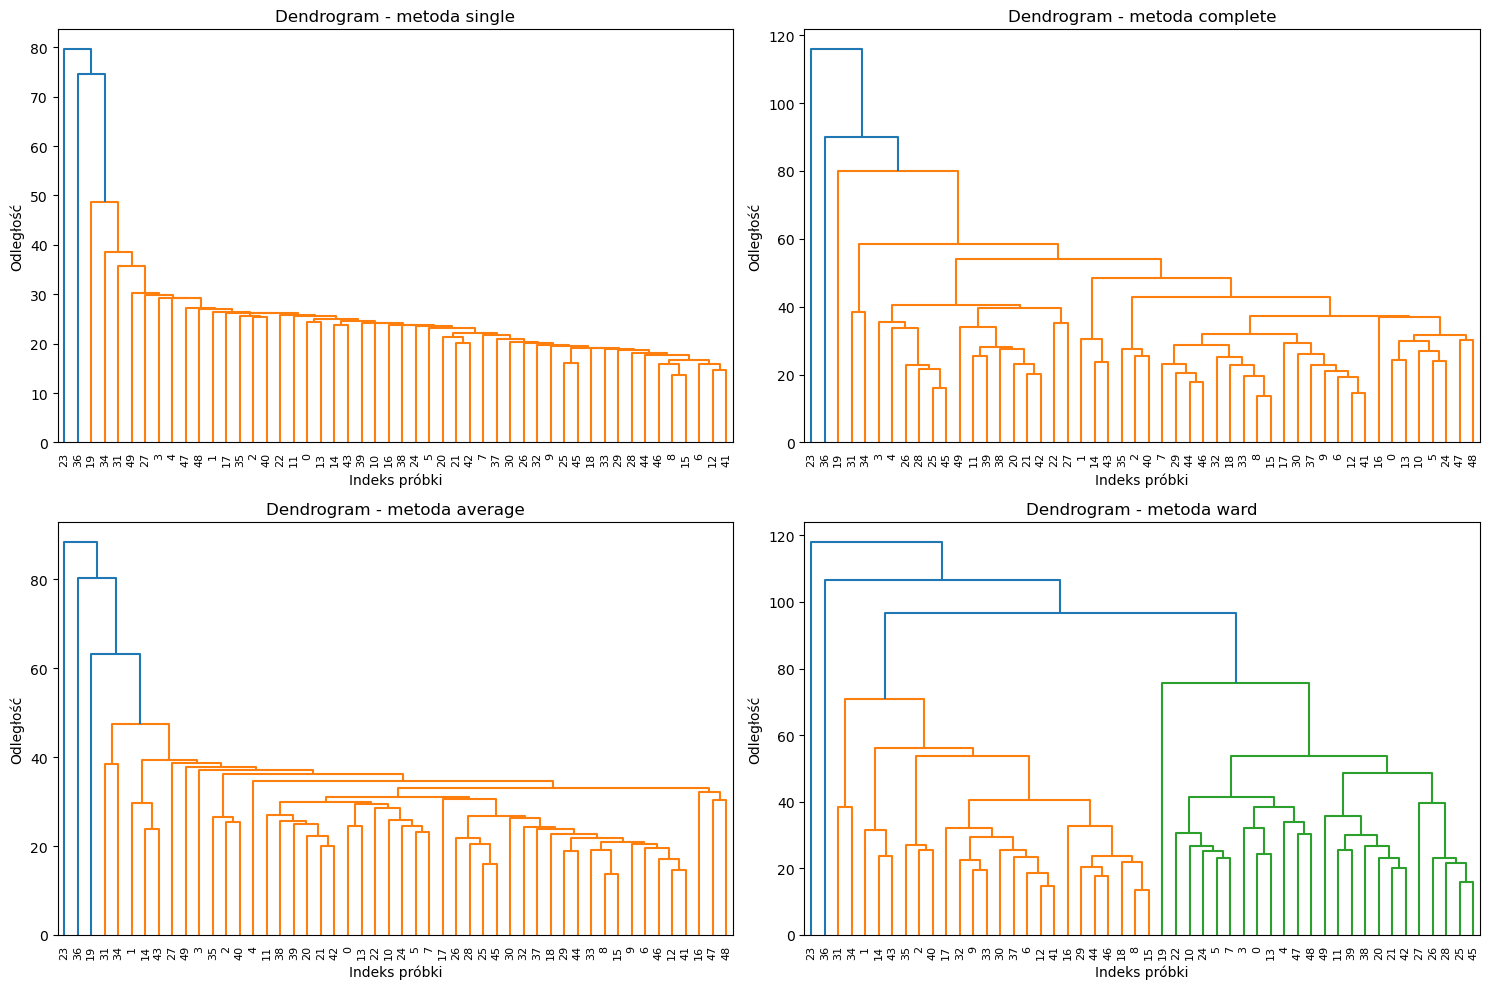

In [12]:
# Mniejsza próbka dla czytelności dendrogramu
np.random.seed(42)
sample_indices = np.random.choice(X_scaled.shape[0], size=50, replace=False)
X_sample = X_scaled[sample_indices]

# Metody łączenia
methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15, 10))

for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(X_sample, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram - metoda {method}')
    plt.xlabel('Indeks próbki')
    plt.ylabel('Odległość')

plt.tight_layout()
plt.show()

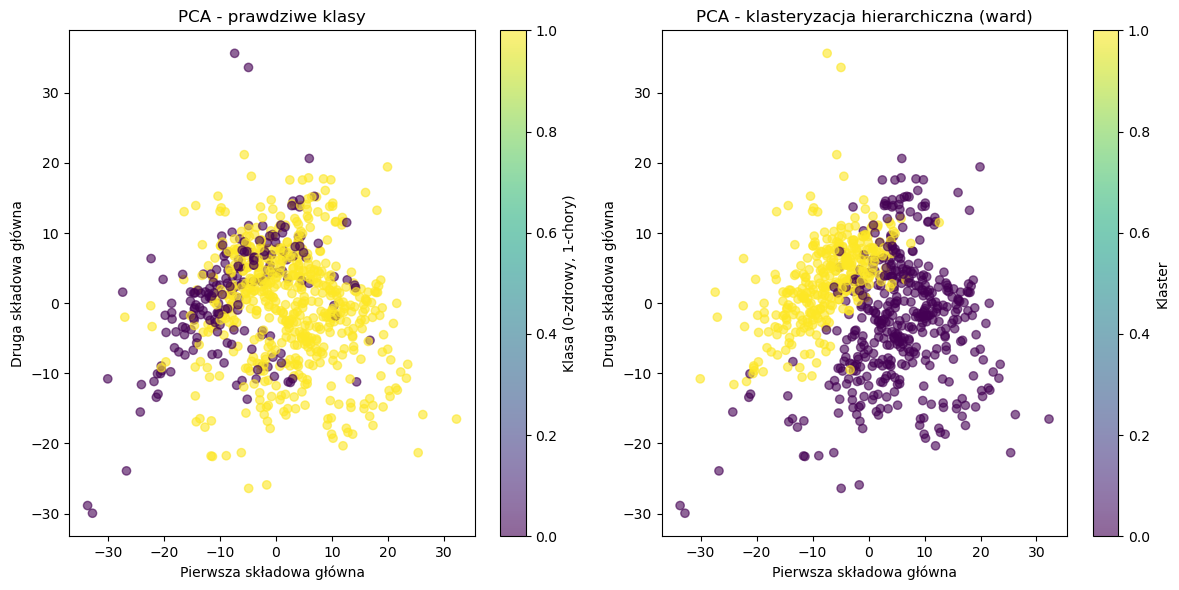

Macierz pomyłek (klaster 0 vs klasa 0, klaster 1 vs klasa 1):
[[ 62 130]
 [368 196]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.14      0.32      0.20       192
           1       0.60      0.35      0.44       564

    accuracy                           0.34       756
   macro avg       0.37      0.34      0.32       756
weighted avg       0.49      0.34      0.38       756



In [14]:
# Wybór metody ward
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_cluster.fit_predict(X_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.title('PCA - prawdziwe klasy')
plt.colorbar(scatter, label='Klasa (0-zdrowy, 1-chory)')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=agg_labels, cmap='viridis', alpha=0.6)
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.title('PCA - klasteryzacja hierarchiczna (ward)')
plt.colorbar(scatter, label='Klaster')

plt.tight_layout()
plt.show()

# Porównanie z prawdziwymi klasami
print("Macierz pomyłek (klaster 0 vs klasa 0, klaster 1 vs klasa 1):")
print(confusion_matrix(y, agg_labels))

print("\nRaport klasyfikacji:")
print(classification_report(y, agg_labels))

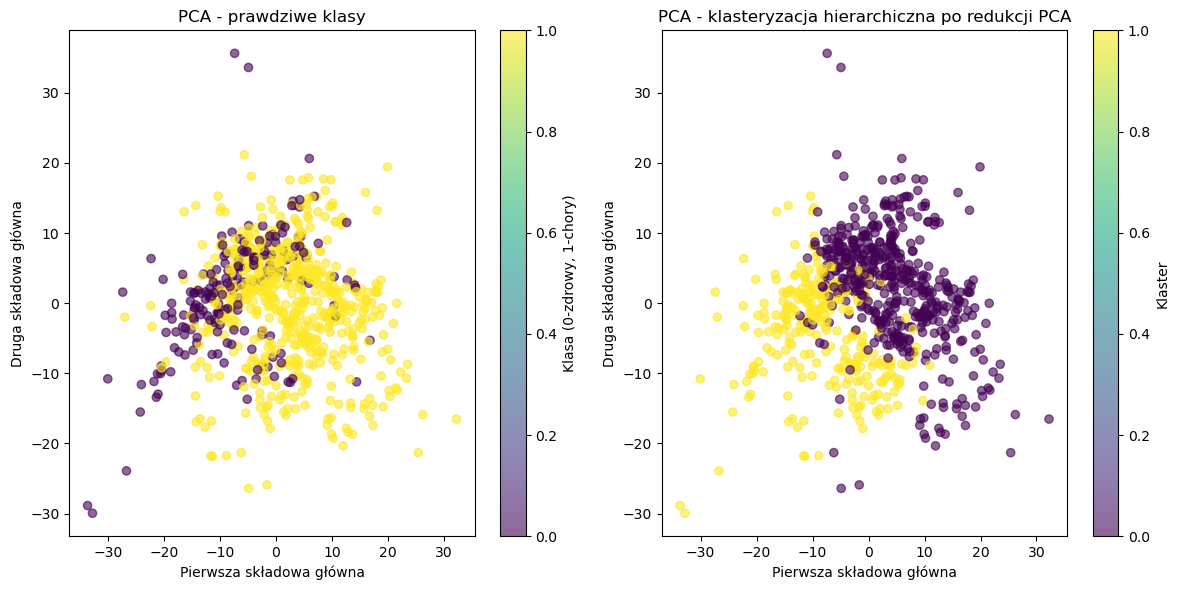

Macierz pomyłek (klaster 0 vs klasa 0, klaster 1 vs klasa 1):
[[ 77 115]
 [409 155]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.16      0.40      0.23       192
           1       0.57      0.27      0.37       564

    accuracy                           0.31       756
   macro avg       0.37      0.34      0.30       756
weighted avg       0.47      0.31      0.33       756



In [16]:
# Redukcja do 10 komponentów 
pca_reduced = PCA(n_components=n_components_95)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)

# Klasteryzacja hierarchiczna na zredukowanych danych
agg_pca = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_pca_labels = agg_pca.fit_predict(X_pca_reduced)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.title('PCA - prawdziwe klasy')
plt.colorbar(scatter, label='Klasa (0-zdrowy, 1-chory)')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=agg_pca_labels, cmap='viridis', alpha=0.6)
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.title('PCA - klasteryzacja hierarchiczna po redukcji PCA')
plt.colorbar(scatter, label='Klaster')

plt.tight_layout()
plt.show()

# Porównanie z prawdziwymi klasami
print("Macierz pomyłek (klaster 0 vs klasa 0, klaster 1 vs klasa 1):")
print(confusion_matrix(y, agg_pca_labels))

print("\nRaport klasyfikacji:")
print(classification_report(y, agg_pca_labels))